In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df = pd.get_dummies(df, columns=['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [6]:
df['Gender']=  df["Gender"].map({
    "Female" : 0,
    "Male": 1
})

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [8]:
from sklearn.preprocessing import LabelEncoder

df["Surname"] = LabelEncoder().fit_transform(df["Surname"])

In [9]:
from sklearn.preprocessing import MinMaxScaler
columns = ["CustomerId", "Surname", "CreditScore", "Balance", "EstimatedSalary"]

for column in columns:
    mx = MinMaxScaler()
    df[column] = mx.fit_transform(df[[column]])

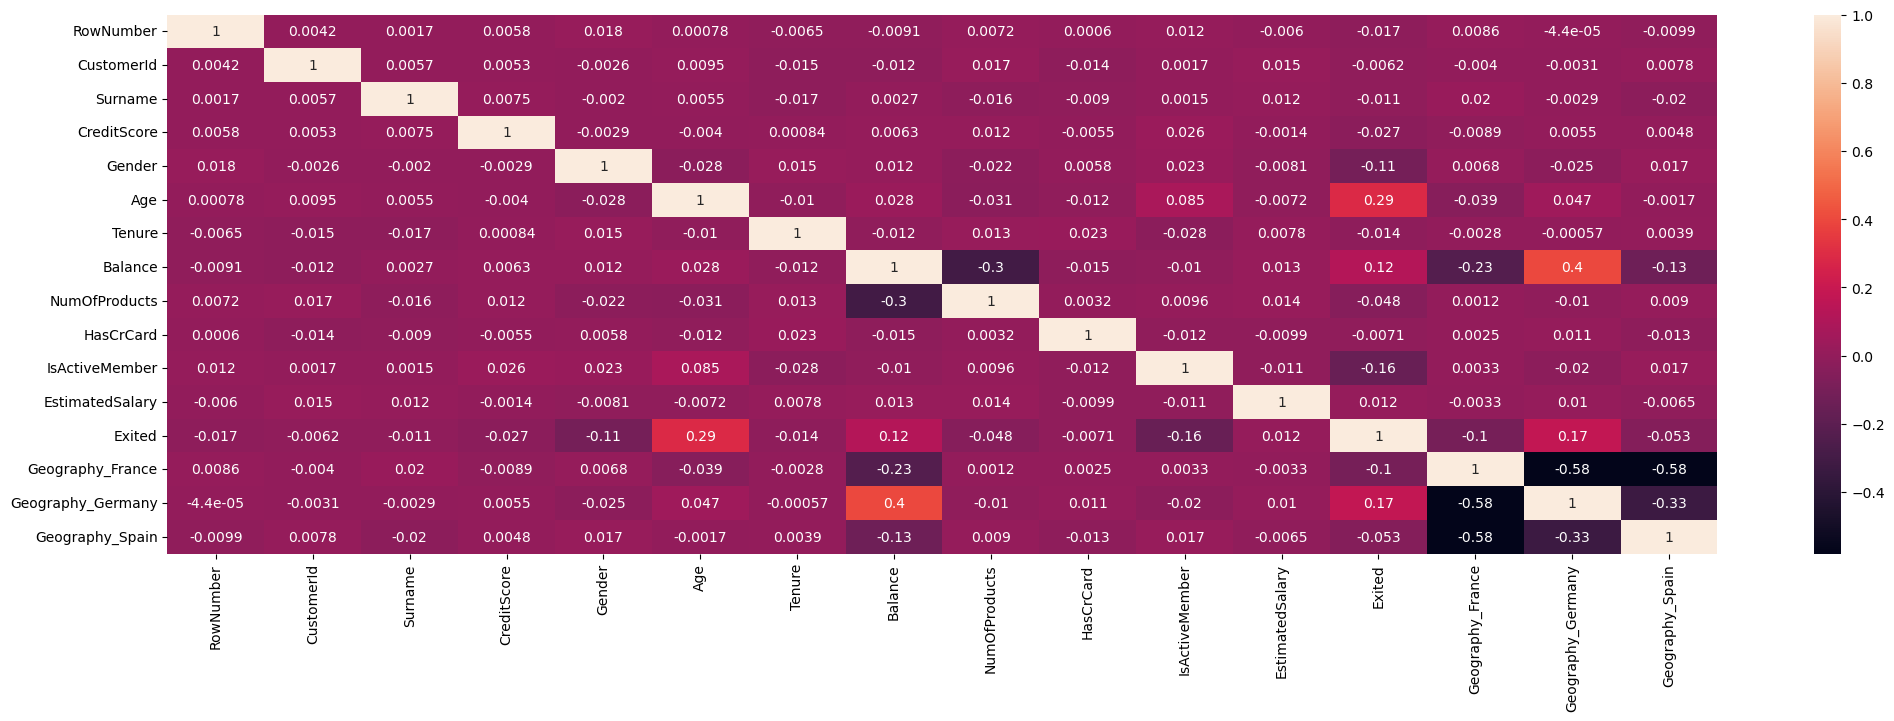

In [10]:
import seaborn as sn
p = df.corr()
plt.figure(figsize=(25,7))
ax= sn.heatmap(p, annot=True)
plt.show()

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

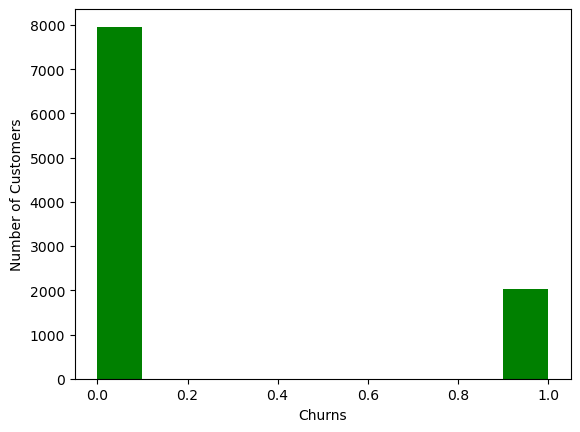

In [13]:
plt.xlabel("Churns")
plt.ylabel("Number of Customers")
plt.hist(df["Exited"], color="g")

In [21]:
df1 = df[df["Exited"] == 0]
df0 = df[df["Exited"]==1]

df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
df0 = df0.sample(df1.shape[0], replace=True)
df2 = pd.concat([df1, df0], axis=0)
df2.Exited.value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7963.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

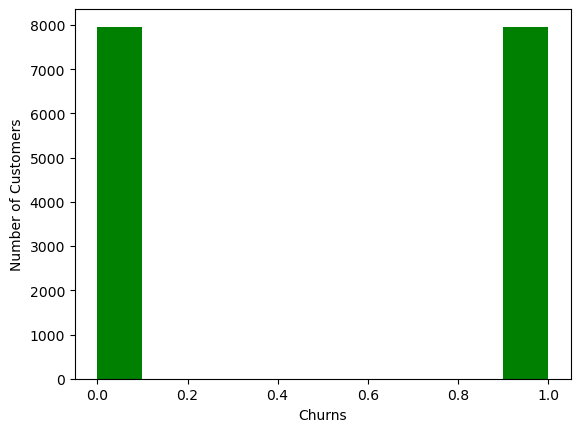

In [24]:
plt.xlabel("Churns")
plt.ylabel("Number of Customers")
plt.hist(df2['Exited'], color="g")

In [25]:
x = df2.drop(["Exited"], axis=1)
y = df2["Exited"]
x.shape, y.shape

((15926, 15), (15926,))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)
x_train.shape, x_test.shape, y_train.value_counts()

((12740, 15),
 (3186, 15),
 Exited
 0    6370
 1    6370
 Name: count, dtype: int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
ran = RandomForestClassifier(n_estimators=100)
dec = DecisionTreeClassifier()

models = {
    "RandomForest" : ran,
    "DesisionTree": dec,
    "LogisticRegression" : LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(gamma="auto", kernel="rbf"),
    "Naive Bayes": MultinomialNB(), 
    "Gradient Boosting": GradientBoostingClassifier()
}

In [29]:
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        "Train Acurracy":var.score(x_train,y_train),
        "precision" : precision_score(y_test, y_predict,average='weighted',zero_division=0),
        "recall" : recall_score(y_test, y_predict,average='weighted',zero_division=0),
        "f1_score" : f1_score(y_test, y_predict,average='weighted',zero_division=0)
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Test Accuracy,Train Acurracy,precision,recall,f1_score
0,RandomForest,0.956999,1.000000,0.957670,0.956999,0.956984
1,DesisionTree,0.918707,1.000000,0.924814,0.918707,0.918414
2,LogisticRegression,0.706215,0.698980,0.706418,0.706215,0.706142
3,Support Vector Machine,0.950408,0.998038,0.950590,0.950408,0.950403
4,Naive Bayes,0.574074,0.565463,0.574083,0.574074,0.574062
5,Gradient Boosting,0.803829,0.809184,0.805258,0.803829,0.803599


In [37]:
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)

y_test = np.array(y_test)
y_predict[:5], y_test[:5]

(array([1, 0, 0, 0, 0], dtype=int64), array([1, 0, 0, 0, 0], dtype=int64))

In [38]:
ran.score(x_test,y_test)

0.9582548650345261

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1593
           1       0.83      0.77      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.81      0.80      0.80      3186
weighted avg       0.81      0.80      0.80      3186



In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1497,   96],
       [  37, 1556]], dtype=int64)

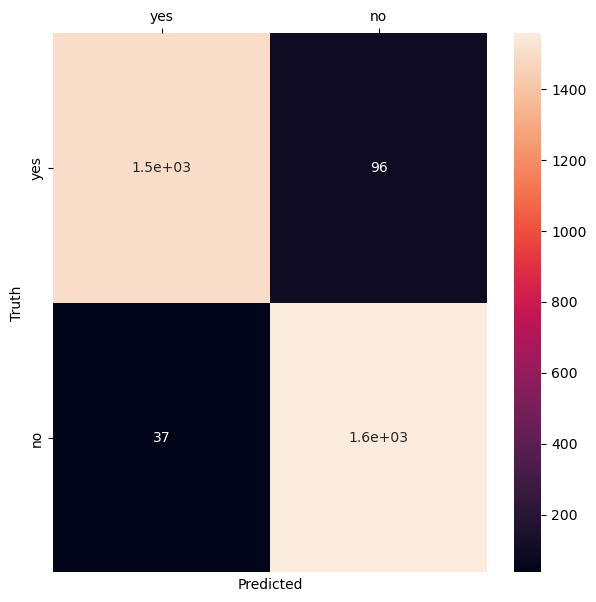

In [41]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
ax= sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
ax.xaxis.set_ticklabels(["yes", "no"])
ax.yaxis.set_ticklabels(["yes", "no"])
ax.xaxis.tick_top()